# FUNDAMENTALS OF DATA ANALYTICS PROJECT
---
# GMIT GRAD. DIP. DATA ANALYTICS
---
# *BOX PLOTS*
---

## INTRODUCTION

[Ref: Applied Statistics and Probability for Engineers](Applied Statistics and Probability for Engineers, Montgomery, D.C.; Runger, G.C.; Wiley and Sons, New York)

**The box plot is a means of graphically displaying the important feature of a dataset such as median, spread, asymmetry and outliers.**

Terms used:
* Median = The point at which the data is divided in half
* Quartile = A quarter of the dataset e.g. q1, the 25th percentile is the first 25% of the data
* Percentile = a percentage of the dataset e.g. the 25th percentile is the first 25% of the data
* Interquartile range(IQR) = q3-q1, i.e. quartile 3 minus quartile 1
* Outlier = A point beyond a whisker but less than 3 interquartile ranges from the boxes edge.

**The Box plot will display:**

**In the Box Area:**
    * The 25^th, the 50^th and the 75^th Quartile
    * A line drawn through the box diagonally at the median i.e. the second quartile
    * The min and max of the data
    
**Two lines extending out from the box at either end (whiskers)**
    * The Lower whisker extends from the first quartile to the smallest data point within 1.5 interquartile ranges
    * The Upper whisker is a line from third quartile to the largest data point 1.5 interquartile ranges from the third         quartile
    * Data further out is plotted as individual points
    * A data point beyond a whisker but less than three interquartile ranges from the box edge is called an **outlier**
    * A point more than 3 interquartile ranges from the box edge is called an **extreme outlier**
    * Different symbols such as open and closed circles may occasionally be used to represent outliers



Image created in MS Visio from one in Applied Statistics and Probability for Engineers

![Box Plot](BoxPlot.PNG.PNG)


Box plots were first described by Tukey *et al* in his book - [1]
In 1978 in: [2] (*Variations of Box plots, Tukey et al, The American Statistician, vol32 (Feb 1978), 1, pp12-16* he describes box plots as a tool to enable exploratory data analysis). 



In their paper, 'Visual Presentation of Data by Means of Box Plots', [3] the authors discuss the use of boxplots as a useful means of interpreting *robust statistics*, i.e. those statistics which describe data with outilers better than those statistics based on the normal distribution. The authors explain how the use of the median as a descriptor and the interquartile range used in Box plots better describe the central tendency and dispersion of the data, respectively. They also explain how the whiskers are used to describe the range of the data.

The authors use the example of a European Union funded study on wine which analyses up to 100 variables on wine composition over many samples. They discuss the initial univariate analysis (and visualisation) of the data using boxplots before the more complex PCA and multivariate techniques were employed.

They describe how Boxplots enable rapid visualisation of
* Outliers
* Skewed distributions, i.e. non-normal data
    Non normal data can be easily visualised using box plots and subsequently transformed in order to perform statistical analysis such as paired t-tests
* Comparing series of results
    Box plots can be used to easily compare sets of results side by side

### VARIATIONS ON THE BOX PLOT



In 'Violin Plots, a Box Plot-Density trace synergism, Hintze and Nelson adapt Tukeys box plot to combine the original box plot with the 'density trace', described by the authors as a smoothed histogram revealing more structure within the data than a conventional box plot alone

**Violin Plot Comparison, Illustration** ![Violin Plot](ViolinPlots.PNG.PNG)

This can be seen in the above illustration, Hintze and Nelson use the comparison of Bimodal, uniform and normal distributions to show the extra characteristic of population density in the violin plot thereby better illustrating the distribution of the data and potentailly highlighting any bumps or clusters in datasets.

### BOXPLOT EXAMPLE: IRISH EXCHEQUER TAX RECEIPTS 1984-2018

 [Source](http://databank.finance.gov.ie/)
 
 (http://databank.finance.gov.ie/FinDataBank.aspx?rep=OpenDataSourceCSV)
 


### **IMPORT THE DATASET**

* The dataset was imported and read as a csv file using the Pandas library, from the Irish government databank site. 
* Column names were added to The Pandas dataframe.

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc

#Import csv file of Irish tax receipts (shorten dataset to 2008-2017)
IrishTax = pd.read_csv('http://databank.finance.gov.ie/FinDataBank.aspx?rep=OpenDataSourceCSV')#Read in the Data
IrishTaxpd = pd.DataFrame(IrishTax)#Create a dataframe

#Define the column names
Tax = IrishTaxpd.rename(index=str, columns={"1984": "YEAR", "January": "MONTH", "Actual Outturn": "DESCR.", "Customs":"TYPE", "8888":"TAX"})
Tax


,YEAR,MONTH,DESCR.,TYPE,TAX
0,1984,January,Actual Outturn,Excise Duty,100210
1,1984,January,Actual Outturn,Capital Gains Tax,2220
2,1984,January,Actual Outturn,Stamps,9683
3,1984,January,Actual Outturn,Income Tax,203590
4,1984,January,Actual Outturn,Corporation Tax,13318
5,1984,January,Actual Outturn,Valued Added Tax,150982
6,1984,January,Actual Outturn,Training and Employment Levy,10542
7,1984,January,Actual Outturn,Motor Vehicle Duties,11136
8,1984,February,Actual Outturn,Customs,9523
9,1984,February,Actual Outturn,Excise Duty,113701


The dataset was broken into data for 1984 using the *.set_index* function in pandas
Ref: 'https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.set_index.html

In [2]:

YEAR = Tax.set_index('YEAR').filter(regex='^1984', axis=0)
YEAR

,MONTH,DESCR.,TYPE,TAX
YEAR,,,,
1984,January,Actual Outturn,Excise Duty,100210
1984,January,Actual Outturn,Capital Gains Tax,2220
1984,January,Actual Outturn,Stamps,9683
1984,January,Actual Outturn,Income Tax,203590
1984,January,Actual Outturn,Corporation Tax,13318
1984,January,Actual Outturn,Valued Added Tax,150982
1984,January,Actual Outturn,Training and Employment Levy,10542
1984,January,Actual Outturn,Motor Vehicle Duties,11136
1984,February,Actual Outturn,Customs,9523


### CREATE NUMPY ARRAY OF DATA

**The following code is an attempt to create a Numpy Array to make it easier to explore the data**

The IrishTax dataset is in stacked format so pivoting of the dataset may be necessary in order to efficiently analyse it. I have tried to convert it back to a Numpy array in order to explore if it can be manipulated in Numpy format.

This proved inadequate as I couldn't contextualise the data in any simple way using Numpy. After various attempts it appears that the indices of the columns seem to be the first row, even though I have renamed them above

In [3]:
#Created a Numpy Array as a side item
IrishTaxNP = np.array(IrishTaxpd) #Create Numpy Array
IrishTaxNP

array([[1984, 'January', 'Actual Outturn', 'Excise Duty', 100210],
       [1984, 'January', 'Actual Outturn', 'Capital Gains Tax', 2220],
       [1984, 'January', 'Actual Outturn', 'Stamps', 9683],
       ...,
       [2018, 'December  ', 'Profile', 'Corporation Tax', 607000],
       [2018, 'December  ', 'Profile', 'Valued Added Tax', 104000],
       [2018, 'December  ', 'Profile', 'Motor Vehicle Duties', 68000]],
      dtype=object)

### CREATE A HISTOGRAM OF THE ENTIRE PANDAS DATASET

This histogram shows how the tax figures change over the years relative to eachother. This histogram gives a broad overview of how the exchecquer tax take varies in the years from 1984 to present.

In [ ]:
#Standard Histogram of Irish Government Tax Take 1994-2018
hist = Tax.hist(column = "YEAR", bins='auto', grid=True, rwidth=0.9, color='#008000')
plt.grid(axis='YEAR')
plt.xlabel('YEAR')
plt.ylabel('Frequency')
plt.title('Irish Tax')



### DESCRIPTIVE STATISTICS

In [ ]:
#Some descriptive statistics of the tax take column of the entire dataframe
#adapted from (https://www.shanelynn.ie/using-pandas-dataframe-creating-editing-viewing-data-in-python/)
Tax['TAX'].describe()

#### CHECK FORMAT OF HEADERS AND VALUES IN THE DATA

This was done to check that data was contextualied correctly in the Dataframe

In [ ]:
index = Tax.index
columns = Tax.columns
values = Tax.values

In [ ]:
index

In [ ]:
columns

In [ ]:
values

### NUMPY ARRAY OF YEAR MONTH AND TAX DATA

In [15]:
#create numpy array of summaries of tax for all years

Summary_Tax = Tax[['YEAR', 'MONTH', 'TAX']]

Summary_Tax_NP =  np.array(Summary_Tax)

Summary_Tax_NP

array([[1984, 'January', 100210],
       [1984, 'January', 2220],
       [1984, 'January', 9683],
       ...,
       [2018, 'December  ', 607000],
       [2018, 'December  ', 104000],
       [2018, 'December  ', 68000]], dtype=object)

### NUMPY ARRAY, STATS  PLOT AND BOXPLOT OF 1984 TAX DATA

In [16]:
#Numpy Array of All Tax figures for 1984, Flattened into a 1 dimensional array
TAXES84 = Summary_Tax.iloc[0:96, 2:3]
TAXES84NP = np.array(TAXES84)
TAXES84NPF = TAXES84NP.flatten
TAXES84NPF()

array([100210,   2220,   9683, 203590,  13318, 150982,  10542,  11136,
         9523, 113701,   2617,  10955, 188239,  13387, 143272,   7988,
        16278,   9523, 120959,   2746,   8652, 250169,  10705, 155572,
         9109,  13722,  10793, 108851,   2448,   5942, 205460,  12701,
        92486,   7691,  10935,  10793, 139832,   3501,  11024, 214197,
        15285, 150408,  11858,  13595,   8403, 129016,   2955,   8366,
       202172,   7362, 110024,  12172,  10468,   9777, 140284,   2834,
         9042, 214770,  59097, 187655,   1590,  11161,  11428, 139500,
         6267,  13613, 191398,  43626, 104885,  18664,  12347,   6707,
       139450,   1389,  39521, 211960,  19074, 179430,   9671,   9725,
        11428, 136311,   4128,   7728, 193393,  28470, 116316,    744,
        10886,  11174, 125735,   3196,  10607, 245345,  33600, 213837],
      dtype=int64)

Tax take for 1984 plotted using matplot lib (below) does not adequately visualise the data in any meaningful way

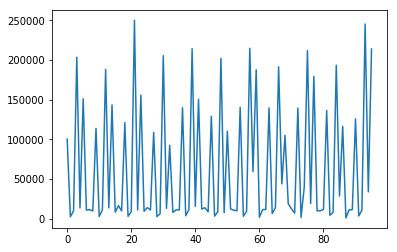

In [17]:
#Tax figures for 1984 plotted simply
plt.plot(TAXES84NP)


**The following summary statistics and boxplot show how summary statistics and a boxplot complement eachother and provide a better picture of the nature of the data**

Its easy to see from the boxplot that the max (250169) is very distant from the median(12524). Also clear is that the 25th percentile (9419) is very low in relation to the rest of the data.

Since the data for 1984 and every other year is heavily stacked with multiple entries for the tax type (e.g. Customs) and each month it again proves that better data wrangling in the form of a pivot is necessary 

In [18]:
# Summary Statistics for 1984 tax data  
TAXES84.describe()

,TAX
count,96.000000
mean,63076.031250
std,76342.110778
min,744.000000
25%,9419.500000
50%,12524.000000
75%,126555.250000
max,250169.000000


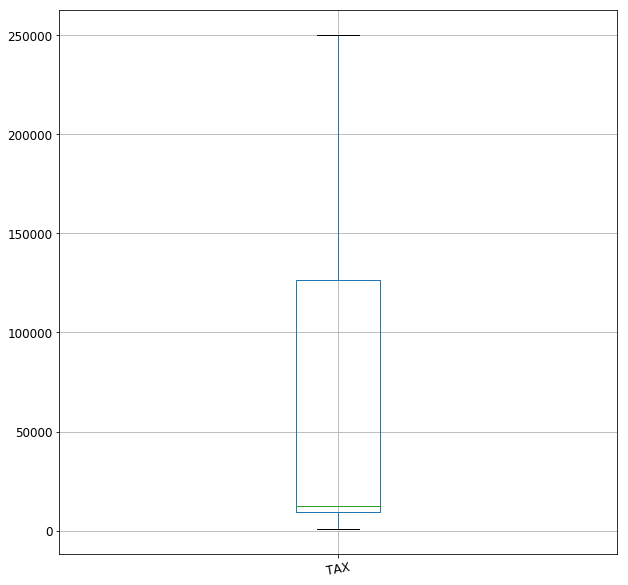

In [19]:
#BOXPLOT OF 1984 TAX FIGURES
TAXES84.boxplot(column=None, by=None, ax=None, fontsize='large', rot=10, grid=True, figsize=(10,10), layout=None, return_type=None)

### BOXPLOT OF ENTIRE DATASET

These boxplots contain too much data. This is an indication that splitting up the dataset is necessary in order to systematically create better visualisations using better contextualised data.

*Attempts were made to pivot the dataset but errors were encountered due to duplicates in dataset*

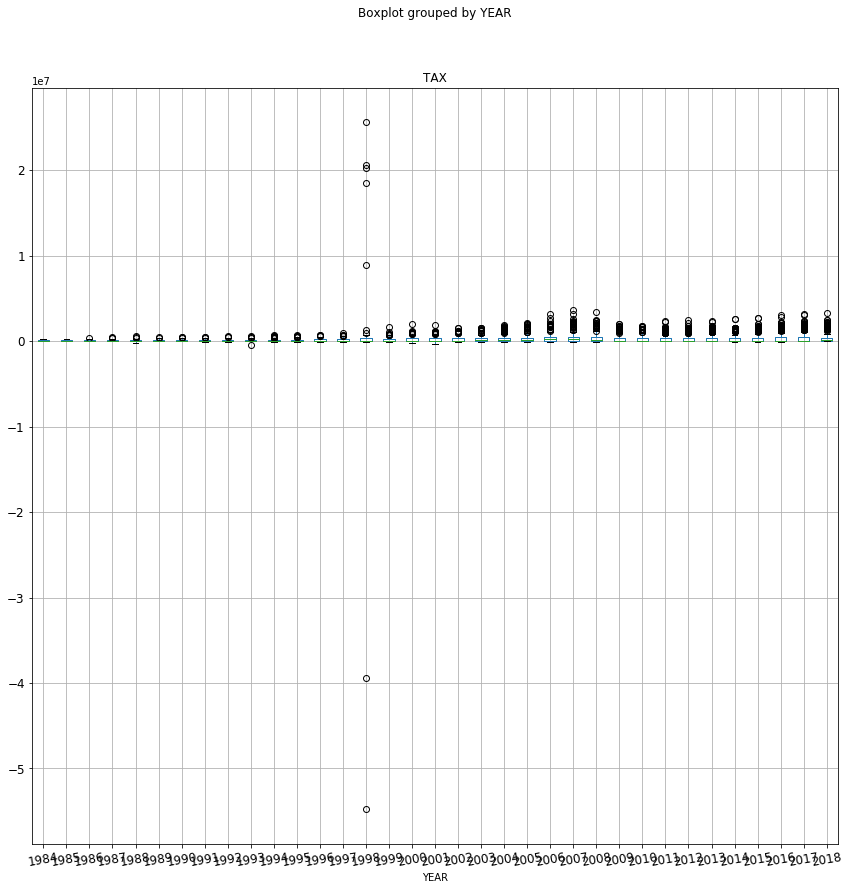

In [20]:
Tax.boxplot(column='TAX', by='YEAR', ax=None, fontsize='large', rot=10, grid=True, figsize=(14,14), layout=None, return_type=None)

### SELECTION OF TAX DATA FROM 1984-2014 IN 5 YR INTERVALS

In [21]:
#Split the dataset into each year from 1984 to 2014
# Adapted from https://stackoverflow.com/questions/27975069/how-to-filter-rows-containing-a-string-pattern-from-a-pandas-dataframe/27975191
YEAR84 = Tax.set_index('YEAR').filter(regex='^1984', axis=0)
YEAR89 = Tax.set_index('YEAR').filter(regex='^1989', axis=0)
YEAR94 = Tax.set_index('YEAR').filter(regex='^1994', axis=0)
YEAR99 = Tax.set_index('YEAR').filter(regex='^1999', axis=0)
YEAR04 = Tax.set_index('YEAR').filter(regex='^2004', axis=0)
YEAR09 = Tax.set_index('YEAR').filter(regex='^2009', axis=0)
YEAR14 = Tax.set_index('YEAR').filter(regex='^2009', axis=0)


In [22]:
#Concatenate the Dataframes from 1984-2014 (5yr intervals)

frames = [YEAR84, YEAR89, YEAR94, YEAR99, YEAR04, YEAR09, YEAR14]

YEAR84TO14 = pd.concat(frames)

YEAR84TO14


,MONTH,DESCR.,TYPE,TAX
YEAR,,,,
1984,January,Actual Outturn,Excise Duty,100210
1984,January,Actual Outturn,Capital Gains Tax,2220
1984,January,Actual Outturn,Stamps,9683
1984,January,Actual Outturn,Income Tax,203590
1984,January,Actual Outturn,Corporation Tax,13318
1984,January,Actual Outturn,Valued Added Tax,150982
1984,January,Actual Outturn,Training and Employment Levy,10542
1984,January,Actual Outturn,Motor Vehicle Duties,11136
1984,February,Actual Outturn,Customs,9523


#### SUMMARY STATISTICS OF TAX DATA 1984-2014

In [23]:
SET84 = YEAR84.describe() 
SET89 = YEAR89.describe()  
SET94 = YEAR94.describe()  
SET99 = YEAR99.describe()   
SET04 = YEAR04.describe()   
SET09 = YEAR09.describe()   
SET14 = YEAR14.describe()

print("Summary for 1984=\n",SET84,'\n', "Summary for 1989=\n",SET89,'\n',"Summary for 1994=\n",SET94,'\n',
      "Summary for 1999=\n",SET99,'\n',"Summary for 2004=\n",SET04,'\n',"Summary for 2009=\n",SET09,'\n',
     "Summary for 2014=\n",SET14,'\n')

Summary for 1984=
                  TAX
count     107.000000
mean    62857.728972
std     77620.328982
min       744.000000
25%      9325.000000
50%     12347.000000
75%    124894.000000
max    275447.000000 
 Summary for 1989=
                  TAX
count     108.000000
mean    87501.657407
std    107468.214698
min      3487.000000
25%     13457.250000
50%     21339.000000
75%    162985.000000
max    433368.000000 
 Summary for 1994=
                  TAX
count     120.000000
mean   114646.300000
std    162746.060963
min    -54189.000000
25%     18030.750000
50%     26896.000000
75%    170066.250000
max    741672.000000 
 Summary for 1999=
                 TAX
count  1.200000e+02
mean   1.963782e+05
std    2.899871e+05
min   -7.058100e+04
25%    1.368875e+04
50%    4.709300e+04
75%    2.948095e+05
max    1.690416e+06 
 Summary for 2004=
                 TAX
count  2.190000e+02
mean   3.149810e+05
std    4.290530e+05
min   -9.094100e+04
25%    1.325500e+04
50%    1.373870e+05
75%    4.0

**The summary of the dataset reveals the presence of negative values in the overall data which are affecting the statistics**

Since no description or accompanying notes came with the dataset it is difficult to understand the reason for negative data within the dataset.

For simplicity it may have been prudent to write some code to strip all the negative values from the dataset to give a more realistic view of the positive data and how it varies.

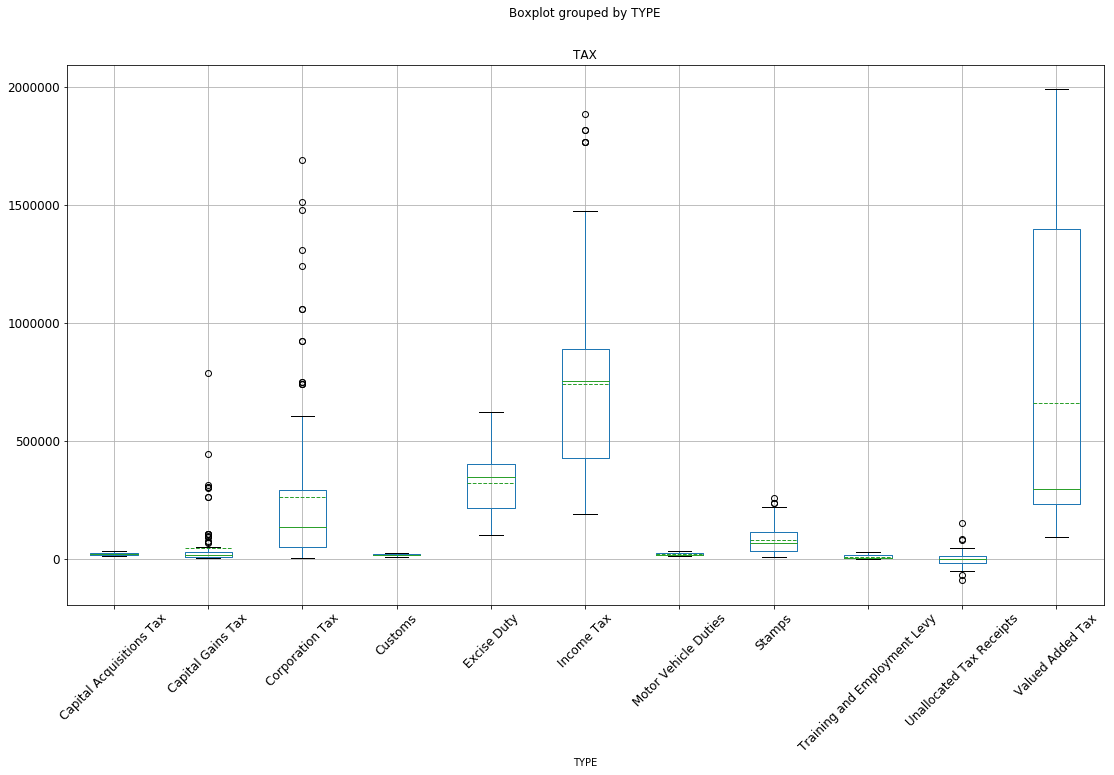

In [24]:
#Matplotlib boxplot of Tax Data by 'TYPE' from 1984-2014
%matplotlib inline
YEAR84TO14.boxplot(column='TAX', by='TYPE', ax=None, fontsize='large', rot=45, grid=True, figsize=(18,10), meanline =True, showmeans = True, layout=None, return_type=None)

Text(0,0.5,'€')

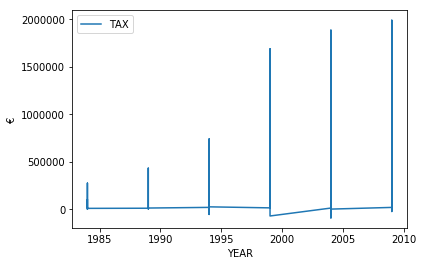

In [25]:
#Simple plot of Tax Data 1984-2014
#
YEAR84TO14[['TAX']].plot(); plt.ylabel('€')

## SEABORN BOXPLOTS

Boxplots of tax data by type i.e. Tax data from 1984-2014 in 5 year intervals with the distribution of tax sorted and displayed by type

https://seaborn.pydata.org/generated/seaborn.boxplot.html

**STANDARD BOXPLOT**

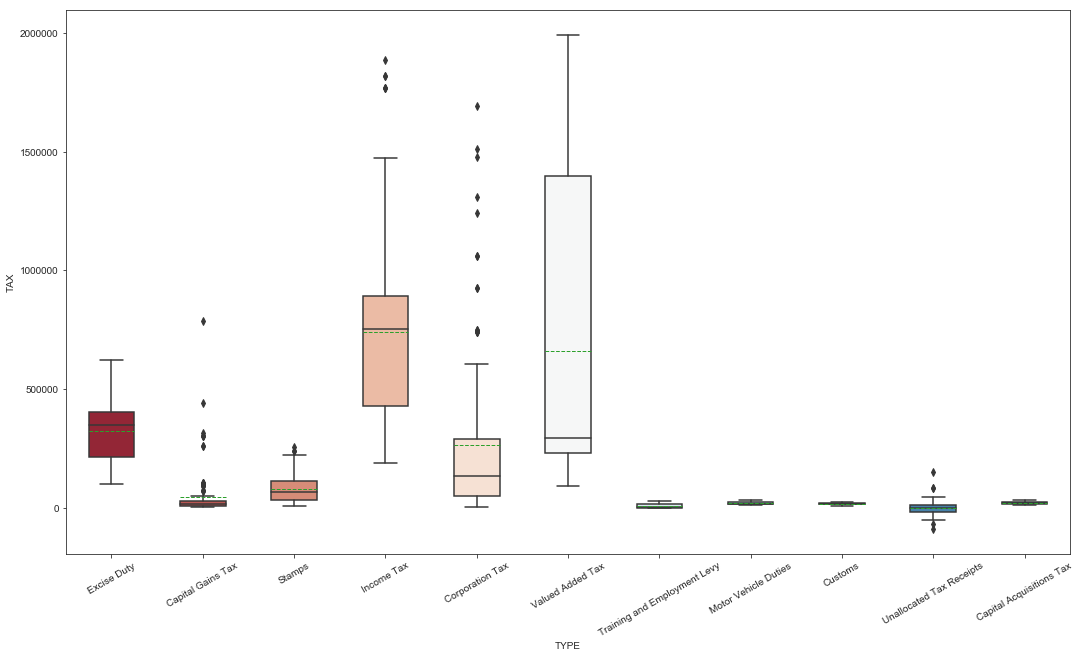

In [26]:
#Seaborn Box plot
#adapted from http://cmdlinetips.com/2018/03/how-to-make-boxplots-in-python-with-pandas-and-seaborn/

#Set the size of the plot from: https://stackoverflow.com/questions/31594549/how-do-i-change-the-figure-size-for-a-seaborn-plot
sns.set_style('ticks')
fig, ax = plt.subplots()

# the size of A4 paper
fig.set_size_inches(18, 10)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30) #rotate x labels 30 degrees credit:https://stackoverflow.com/questions/44954123/rotate-xtick-labels-in-seaborn-boxplot
TAX_SNS_Bplot=sns.boxplot(y='TAX', x='TYPE', data=YEAR84TO14, width=0.5, palette="RdBu", meanline =True, showmeans = True)

**BOXPLOT/SWARMPLOT**

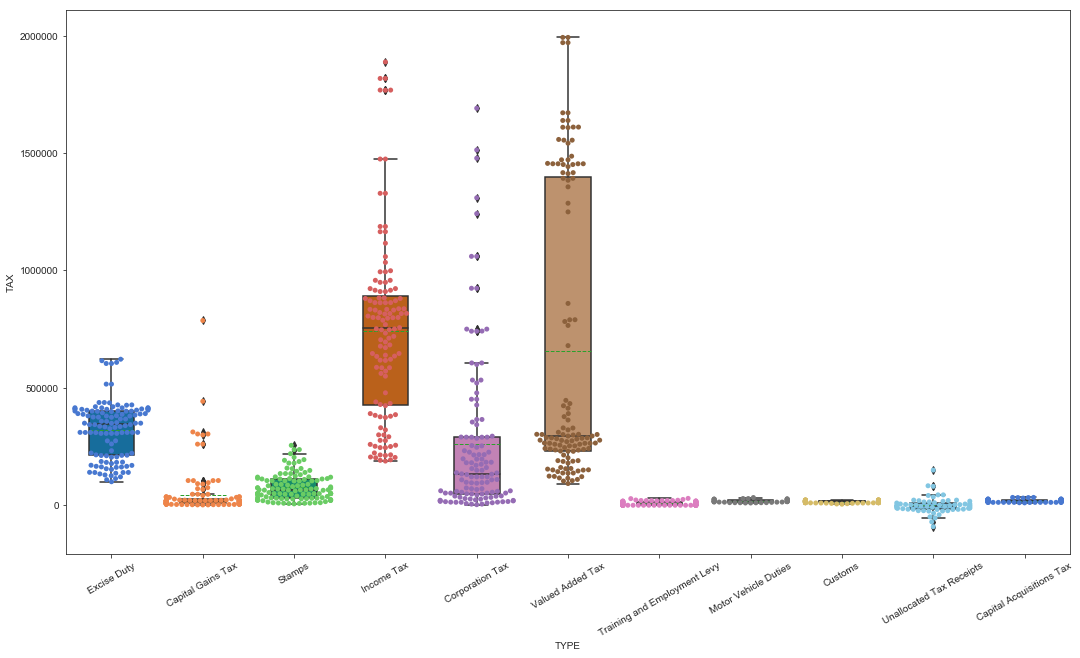

In [27]:
# Boxplot and swarmplot combined: from https://seaborn.pydata.org/generated/seaborn.boxplot.html
#Set the size of the plot from: https://stackoverflow.com/questions/31594549/how-do-i-change-the-figure-size-for-a-seaborn-plot
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(18, 10)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
ax = sns.boxplot(y='TAX', x='TYPE', data=YEAR84TO14, width=0.5, palette="colorblind", meanline =True, showmeans = True)
ax = sns.swarmplot(y='TAX', x='TYPE', data=YEAR84TO14, color=".25", palette="muted")

**Violin Plot**

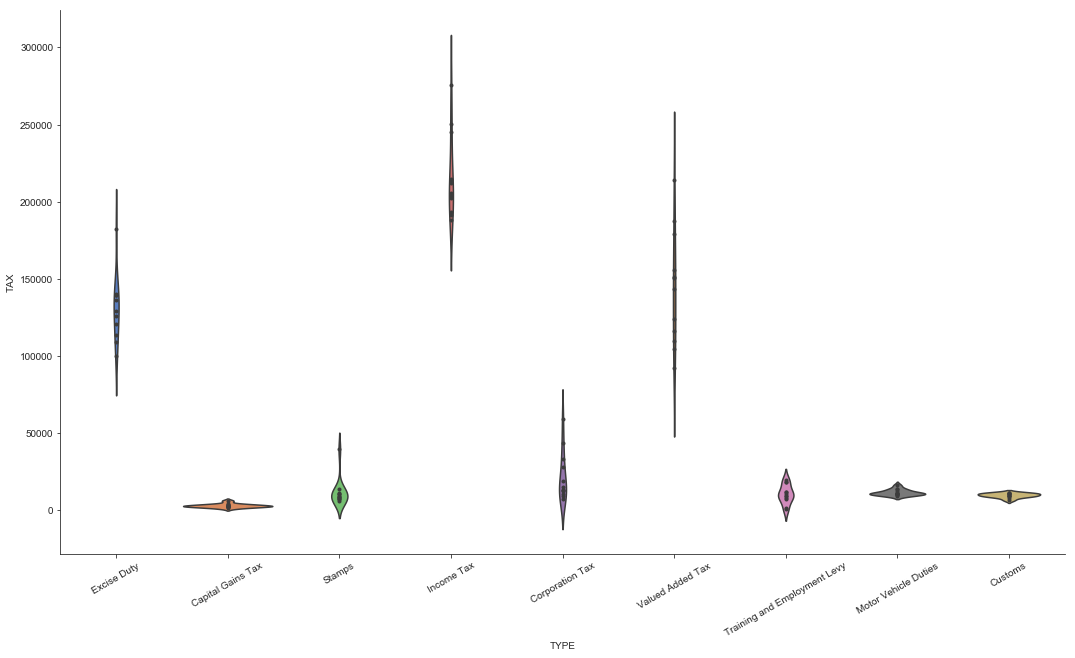

In [28]:
# Violin Plot: from https://seaborn.pydata.org/generated/seaborn.boxplot.html
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(18, 10)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
sns.violinplot(y='TAX', x='TYPE',data=YEAR84, color=".25", palette="muted", inner="points", ax=ax)    
sns.despine()

### DISCUSSION
---

#### THE DATASET
---

The dataset was a real world one and was extremely stacked in nature. Attempts were made to reshape it but ultimately due to the scope of the project it was decided to select a small number of years of data and create boxplots from them, i.e. 5 yr intervals from 1984 to 2014. Selecting a very large real world dataset, while making the assignment more challenging proved a learning experience on how data wrangling is a key element of data analytics. These challenges highlighted the fact that not all datsets are presented in a manner which lends itself to easy analysis.

#### BOXPLOTS
---

**STANDARD BOX PLOTS**

The basic boxplot is a useful visual which enables a complete overview of the distribution of the entire dataset. In the context of the daset used here it allowed comparison of the tax data distribution over the years by tax type. Each quartile, mean, and overall distribution could be clearly viewed in a way that is easier to interpret then a table of figures.

**VIOLIN PLOTS**

Violin plots have a standard boxplot and the "violin plot features a kernel density estimation of the underlying distribution" ref: https://seaborn.pydata.org/generated/seaborn.violinplot.html?highlight=violin. The addition of the KDE adds another layer of information to the boxplot. Knowledge of the underlying nature of the data distribution is an important aspect of data analysis as it determines subsequent statistical analysis on parametric data. Non-parametric data distributions are tested using non-parametric statistical tests.

The violin plot of our own data is not providing a useful visualisation as the KDE is quite smooth. This may be due to the small size of the dataset used. 

**SWARMPLOTS**

Swarmplots, ref: https://seaborn.pydata.org/generated/seaborn.swarmplot.html#seaborn.swarmplot perovide another means of visualising the underlying distribution of the dataset along with the visual and information conveyed by the standard boxplot.

**SUMMARY STATISTICS**

---

As with most datasets, the summary statistics provide only part of the story. Most notably the presence of negative values in the dataset created an inaccurate analysis - as no explanation was provided with the dataset it is difficult to know why negative data were reported. Nevertheless, a combination of summary statistics and the graphical visualisations of the data using plots and boxplots created a better overall picture of the nature of the dataset.

### REFERENCES
* [1] J. W. Tukey. Exploratory Data Analysis. Addison–Wesley, 1970
* [2] (*Variations of Box plots, Tukey et al, The American Statistician, vol32 (Feb 1978), 1, pp12-16* 
* [3] (http://citeseerx.ist.psu.edu/viewdoc/download;jsessionid=FA64F0BF4F9B16036ECDDE4FC11CC2C9?doi=10.1.1.169.9952&rep=rep1&type=pdf) Visual Presentation of Data by Means of Box Plots
* [4] (https://quantixed.org/wp-content/uploads/2014/12/hintze_1998.pdf) Hintze, J.L.; Nelson, R.D.Violin Plots, a Box Plot-Density Trace Synergism, The American Statistician, VOL52, no.2, May 1998, Pages 181-184
* [5] https://seaborn.pydata.org/generated/seaborn.boxplot.html
* [6] https://seaborn.pydata.org/generated/seaborn.violinplot.html?highlight=violin
* [7] https://seaborn.pydata.org/generated/seaborn.swarmplot.html#seaborn.swarmplot

